# Denoising Testing 2D
- CNN - regular convolutional neural network
- ConvNN_2D - all sample
- ConvNN_2D random sample
- ConvNN_2D_spatial - spatial sample
- Branching Network - CNN + ConvNN_2D

In [1]:
# Torch
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 


# Train + Data 
import sys 
sys.path.append('../Layers')
from Conv1d_NN import *
from Conv2d_NN import *

from Conv1d_NN_spatial import * 
from Conv2d_NN_spatial import * 

sys.path.append('../Data')
from CIFAR10 import CIFAR10_denoise, test_denoise_visual

sys.path.append('../Models')
from models_2d import *


sys.path.append('../Train')
from train2d import * 


/Users/mingikang/miniforge3/envs/ML/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## I. Data + Training

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


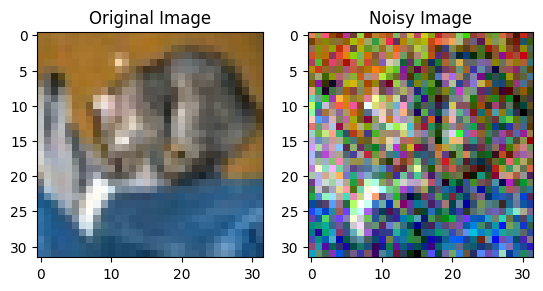

In [2]:
cifar10 = CIFAR10_denoise(noise_std=.9)

cifar10.visual()


# II. Denoising Model + Evaluation

### 1. CNN

Epoch 1, Time: 8.085890054702759, Loss: 0.13442030030748117
Epoch 2, Time: 7.9485979080200195, Loss: 0.09315043807868152
Epoch 3, Time: 7.891163349151611, Loss: 0.08897623444533409
Epoch 4, Time: 7.912142038345337, Loss: 0.08695885480936531
Epoch 5, Time: 8.421863079071045, Loss: 0.08594539850149922
Epoch 6, Time: 8.108955144882202, Loss: 0.08510620888236843
Epoch 7, Time: 7.804952144622803, Loss: 0.08456385628227382
Epoch 8, Time: 7.81986403465271, Loss: 0.08421792474854023
Epoch 9, Time: 8.541548013687134, Loss: 0.08393086211951188
Epoch 10, Time: 8.966979265213013, Loss: 0.0837237577399482

 Average epoch time: 8.150195503234864
Average loss on test set: 0.08313083164631181


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 10.804792179423533


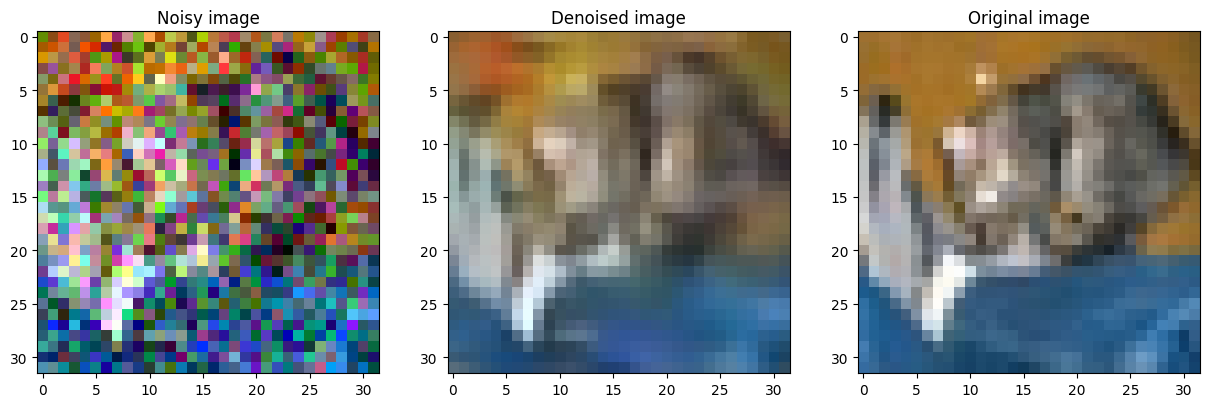

In [3]:
# CNN control model 
CNN = DenoisingCNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(CNN.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(CNN, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(CNN, cifar10.test_loader, criterion)
evaluate_accuracy_psnr(CNN, cifar10.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(CNN, cifar10.test_loader)


### 2. ConvNN_2D, K, N = All

Epoch 1, Time: 70.71405601501465, Loss: 0.19385212747489705
Epoch 2, Time: 69.81097912788391, Loss: 0.14861982797875123
Epoch 3, Time: 68.73827886581421, Loss: 0.1441525706397298
Epoch 4, Time: 70.63339972496033, Loss: 0.1420556410499241
Epoch 5, Time: 69.45410299301147, Loss: 0.14042719139162538
Epoch 6, Time: 68.18068289756775, Loss: 0.13937164732562307
Epoch 7, Time: 68.19706702232361, Loss: 0.1385662457941438
Epoch 8, Time: 68.13720917701721, Loss: 0.1380415666476845
Epoch 9, Time: 68.18349599838257, Loss: 0.1376049014765893
Epoch 10, Time: 68.1719958782196, Loss: 0.13718467110486895

 Average epoch time: 69.02212677001953
Average loss on test set: 0.13728430392635857


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 8.62436069804392


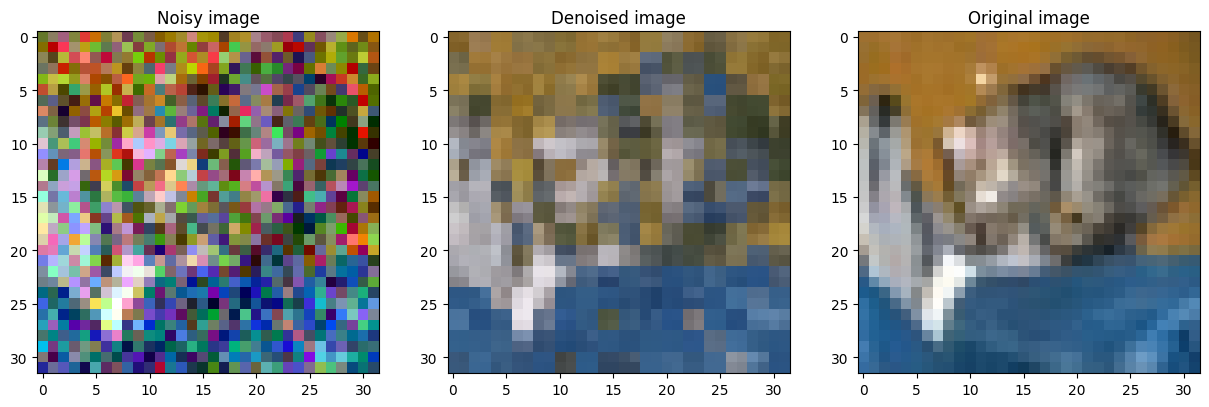

In [6]:
# ConvNN 2D,  K,  N = All

denoising_convNN_2d_k_all = DenoisingConvNN_2D_K_All()
criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2d_k_all.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2d_k_all, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoising_convNN_2d_k_all, cifar10.test_loader, criterion)
evaluate_accuracy_psnr(denoising_convNN_2d_k_all, cifar10.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoising_convNN_2d_k_all, cifar10.test_loader)

### 3. ConvNN_2D, K, N = All, Location Channels

Epoch 1, Time: 98.84666180610657, Loss: 0.19084953168011687
Epoch 2, Time: 94.71071124076843, Loss: 0.14533783367756384
Epoch 3, Time: 94.61223316192627, Loss: 0.14149860088782543
Epoch 4, Time: 95.74302387237549, Loss: 0.13976641784391136
Epoch 5, Time: 96.25259804725647, Loss: 0.1382087174888767
Epoch 6, Time: 94.33811211585999, Loss: 0.13755618464535155
Epoch 7, Time: 94.67272186279297, Loss: 0.13673546748316806
Epoch 8, Time: 94.18862295150757, Loss: 0.13600424833386146
Epoch 9, Time: 95.333575963974, Loss: 0.13551812464623805
Epoch 10, Time: 97.21959900856018, Loss: 0.1350903274572414

 Average epoch time: 95.59178600311279
Average loss on test set: 0.1349885345074781


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 8.68713149295491


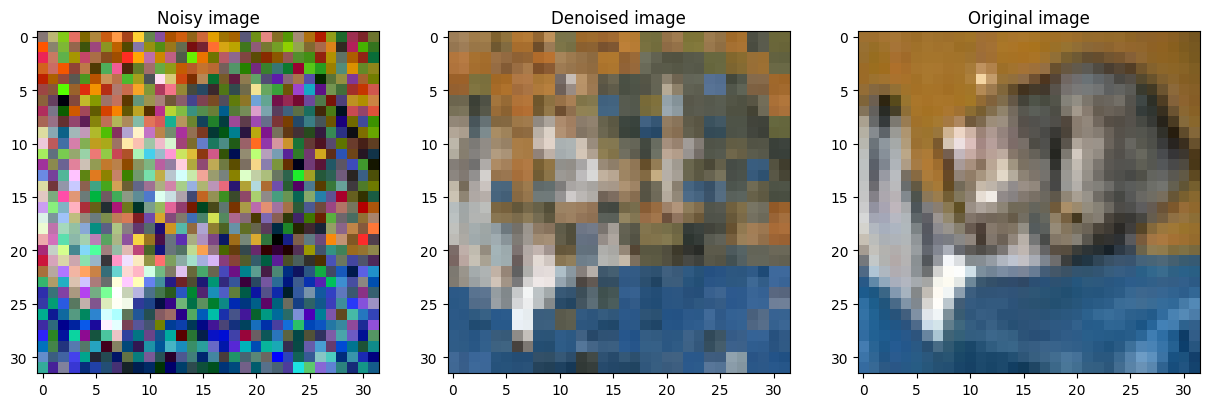

In [7]:
# ConvNN 2D,  K,  N = All, Location Channels
denoising_convNN_2d_k_all_location = DenoisingConvNN_2D_K_All_Location()

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2d_k_all_location.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2d_k_all_location, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoising_convNN_2d_k_all_location, cifar10.test_loader, criterion)
evaluate_accuracy_psnr(denoising_convNN_2d_k_all_location, cifar10.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoising_convNN_2d_k_all_location, cifar10.test_loader)

### 4. Local - Global ConvNN 2D, K, N = All

Epoch 1, Time: 61.79163384437561, Loss: 0.14603644959114093
Epoch 2, Time: 60.77578520774841, Loss: 0.1007368504105474
Epoch 3, Time: 60.627474308013916, Loss: 0.09529268956931351
Epoch 4, Time: 77.59071779251099, Loss: 0.09247162806637146
Epoch 5, Time: 79.8382019996643, Loss: 0.0905860914751087
Epoch 6, Time: 79.37839603424072, Loss: 0.08934914744685372
Epoch 7, Time: 78.73519992828369, Loss: 0.08856057475709245
Epoch 8, Time: 78.76030492782593, Loss: 0.08788988333376473
Epoch 9, Time: 79.58485007286072, Loss: 0.0874450043263033
Epoch 10, Time: 78.14682912826538, Loss: 0.08709384866840089

 Average epoch time: 73.52293932437897
Average loss on test set: 0.08724449124116047


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 10.591595042283368


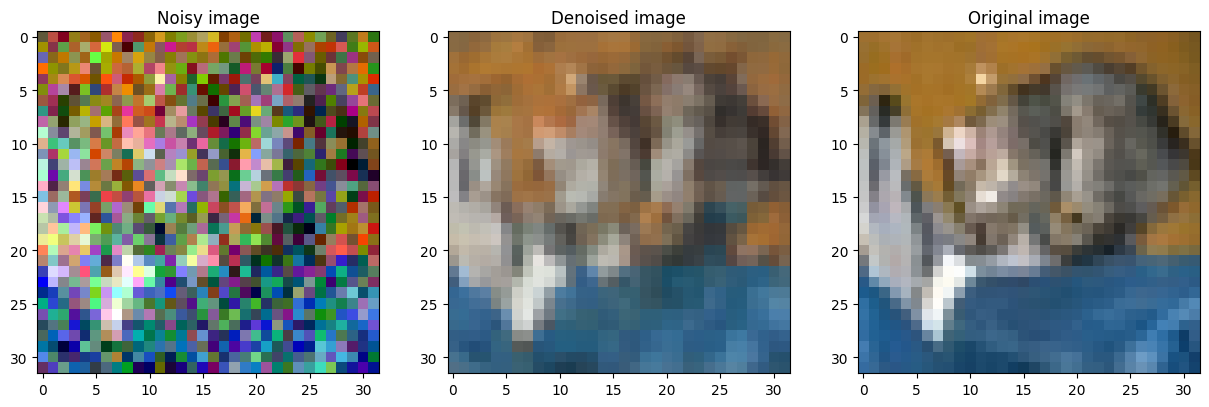

In [9]:
# Branching Network K All Samples
denoising_local_global_convNN = DenoisingLocal_Global_ConvNN_2D()
criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_local_global_convNN.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_local_global_convNN, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoising_local_global_convNN, cifar10.test_loader, criterion)
evaluate_accuracy_psnr(denoising_local_global_convNN, cifar10.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoising_local_global_convNN, cifar10.test_loader)

### 5. Global - Local ConvNN 2D, K, N = All

Epoch 1, Time: 35.678236961364746, Loss: 0.1460589773266974
Epoch 2, Time: 35.89630937576294, Loss: 0.09575153397553413
Epoch 3, Time: 35.98905301094055, Loss: 0.09009138944432558
Epoch 4, Time: 35.67241096496582, Loss: 0.0878108379900303
Epoch 5, Time: 35.97120404243469, Loss: 0.08676008481884856
Epoch 6, Time: 36.80987095832825, Loss: 0.08610180833989092
Epoch 7, Time: 36.07267618179321, Loss: 0.08571587744004586
Epoch 8, Time: 36.03876209259033, Loss: 0.08529731566491335
Epoch 9, Time: 35.94636797904968, Loss: 0.08500982585656064
Epoch 10, Time: 35.71288704872131, Loss: 0.08471535958940415

 Average epoch time: 35.978777861595155
Average loss on test set: 0.08405015503714798


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 10.759264399291604


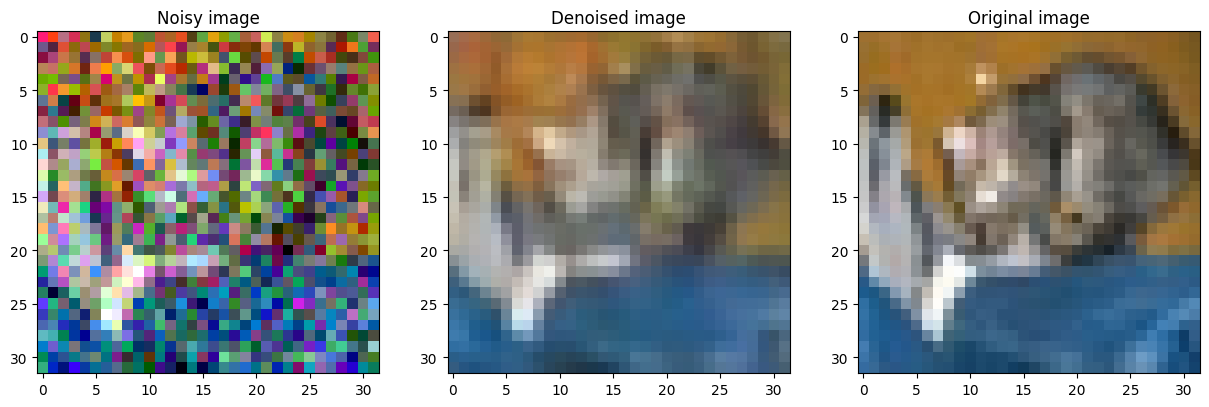

In [10]:
# Branching Network K All Samples
denoising_global_local_convNN = DenoisingGlobal_Local_ConvNN_2D()
criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_global_local_convNN.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_global_local_convNN, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoising_global_local_convNN, cifar10.test_loader, criterion)
evaluate_accuracy_psnr(denoising_global_local_convNN, cifar10.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoising_global_local_convNN, cifar10.test_loader)

### 6. Branching Network (CNN + ConvNN_2D), K, N = All

Epoch 1, Time: 73.19515109062195, Loss: 0.16915491887408754
Epoch 2, Time: 72.90239524841309, Loss: 0.08890467622052983
Epoch 3, Time: 73.06260776519775, Loss: 0.08501959263401873
Epoch 4, Time: 72.94236898422241, Loss: 0.08309475283907808
Epoch 5, Time: 73.02970623970032, Loss: 0.0816409271067518
Epoch 6, Time: 75.23660898208618, Loss: 0.08066215136510027
Epoch 7, Time: 75.2715630531311, Loss: 0.0798418626494115
Epoch 8, Time: 71.10267090797424, Loss: 0.0793392050182423
Epoch 9, Time: 71.00362396240234, Loss: 0.07883702586297794
Epoch 10, Time: 71.02864694595337, Loss: 0.07840901582747165

 Average epoch time: 72.87753431797027
Average loss on test set: 0.07822508103908248


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 11.071041981885388


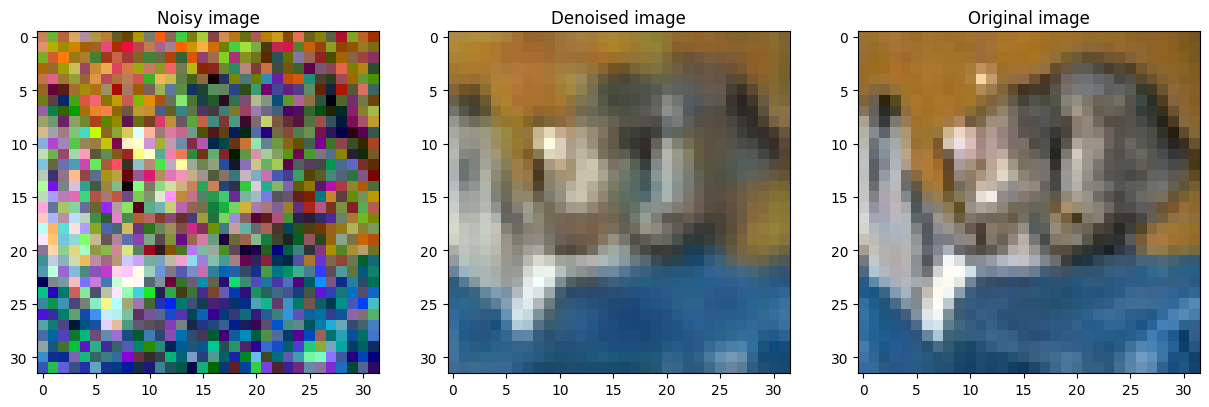

In [8]:
# Branching Network K All Samples
denoising_branching_k_all = DenoisingBranching_ConvNN_2D_K_All()
criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_branching_k_all.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_branching_k_all, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoising_branching_k_all, cifar10.test_loader, criterion)
evaluate_accuracy_psnr(denoising_branching_k_all, cifar10.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoising_branching_k_all, cifar10.test_loader)